# Problem Statement
Welcome DataHacker!

Congratulations on your new job! This time you are helping out Unicorn Investors with your data hacking skills. They are considering making an investment in a new form of transportation - JetRail. JetRail uses Jet propulsion technology to run rails and move people at a high speed! While JetRail has mastered the technology and they hold the patent for their product, the investment would only make sense, if they can get more than 1 Million monthly users with in next 18 months.

You need to help Unicorn ventures with the decision. They usually invest in B2C start-ups less than 4 years old looking for pre-series A funding. In order to help Unicorn Ventures in their decision, you need to forecast the traffic on JetRail for the next 7 months. You are provided with traffic data of JetRail since inception in the test file.

### Evaluation Metric:
Root Mean Squre Error (RMSE) is the evaluation metric for this contest

<b>Note:</b> Public and private split is 20:80 where first 44 days in public and next 169 days in private

In [43]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as sts
import scipy.stats as stats

In [44]:
data = pd.read_csv('train_data.csv')
data['Datetime'] = pd.to_datetime(data['Datetime'])
data.head()

,Datetime,Count
0,2012-08-25 00:00:00,8
1,2012-08-25 01:00:00,2
2,2012-08-25 02:00:00,6
3,2012-08-25 03:00:00,2
4,2012-08-25 04:00:00,2


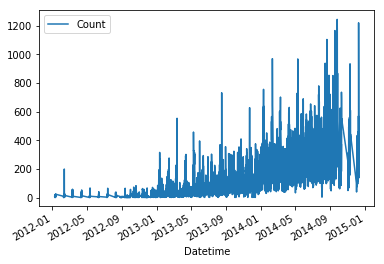

In [45]:
data.plot(x='Datetime',y='Count')

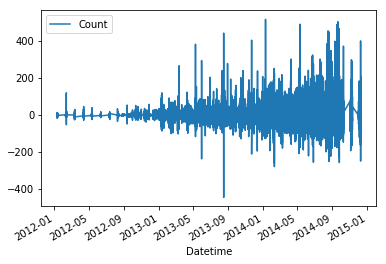

In [52]:
data_diff_1 = data.set_index('Datetime').diff()
data_diff_1 = data_diff_1.reset_index()
data_diff_1.drop([0],inplace=True)
data_diff_1.plot(x='Datetime',y='Count')
#data_diff_1.head()

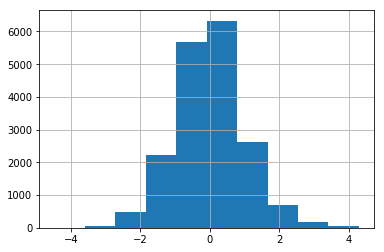

In [56]:

per = data_diff_1['Datetime'].dt.to_period('D')
data_diff_1['std_count'] = data_diff_1.groupby(per)['Count'].transform(lambda x:(x - x.mean())/x.std())
#day_std = data_diff_1.groupby(per).transform(lambda x:x.std())
#day_std.head()
#data_diff_1['Count'] = (data_diff_1['Count']-day_mean)/day_std
#data_diff_1.plot()
data_diff_1['std_count'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000169389D7588>]],
      dtype=object)

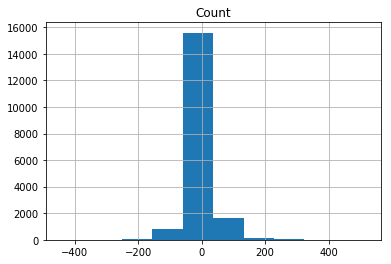

In [15]:
data_diff_1.hist()